In [1]:
from sklearn.datasets import make_regression
import statsmodels.api as sm

# 100개의 데이터 생성

X0, y, coef = make_regression(n_samples=100, n_features=1, noise = 20,
                             coef=True, random_state=1)

In [2]:
# 레버리지가 높은 가상의 데이터 추가
data_100 = (4, 300)
data_101 = (3, 150)
X0 = np.vstack([X0, np.array([data_100[:1], data_101[:1]])])
X = sm.add_constant(X0)
y = np.hstack([y, [data_100[1], data_101[1]]])

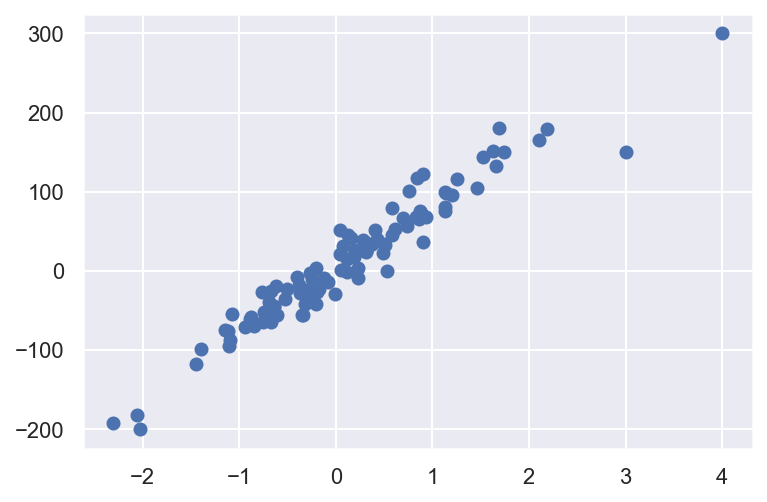

In [3]:
plt.scatter(X0, y)
plt.show()

In [4]:
model = sm.OLS(pd.DataFrame(y), pd.DataFrame(X))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     1464.
Date:                Mon, 05 Apr 2021   Prob (F-statistic):           1.61e-61
Time:                        15:17:25   Log-Likelihood:                -452.71
No. Observations:                 102   AIC:                             909.4
Df Residuals:                     100   BIC:                             914.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              3.2565      2.065      1.577      0.1

In [5]:
influence = result.get_influence()
# 레버리지 벡터의 값
hat = influence.hat_matrix_diag

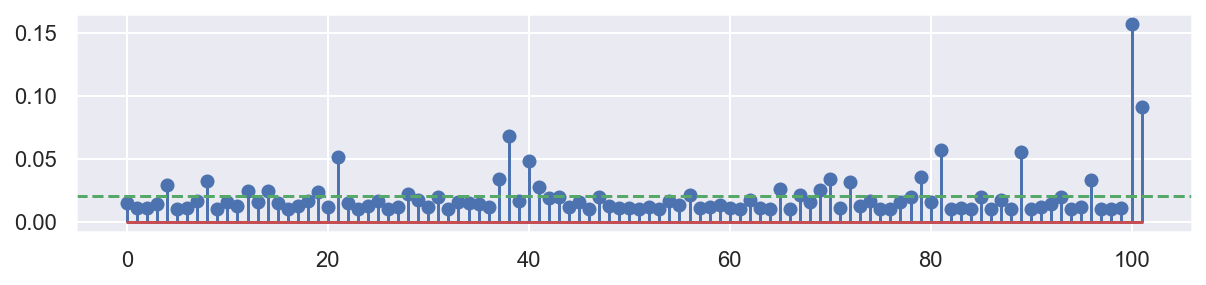

In [7]:
plt.figure(figsize=(10, 2))
plt.stem(hat)
# 바차트와 유사하지만 폭이 없다
plt.axhline(0.02, c = 'g', ls = '--')
plt.show()

# axhline()은 수평선, 첫번째 인자는 수평선 그릴 위치, 두 세번째는 어디서부터 어디까지 (디폴트:0 ~1)
# 0은 왼쪽 끝, 1은 오른쪽 끝
# axvline() 은 수직선
# hlines()
# vlines()

In [8]:
hat.sum()

2.0000000000000004

## 결론
- 레버리지가 큰 데이터는 모형에 주는 영향이 크다. 
- 레버리지가 작은 데이터는 회귀분석에 영향을 크게 주지 않는다. 
- 레버리지가 크더라도 오차가 작은 데이터는 분석 포함여부와 관계없이 모형이 크게 달라지지 않는다.


## 아웃라이어
- 아웃라이어: 잔차가 큰 데이터
- 표준화 잔차: 잔차를 레버리지와 잔차의 표준편차로 나누어 스케일링한 것

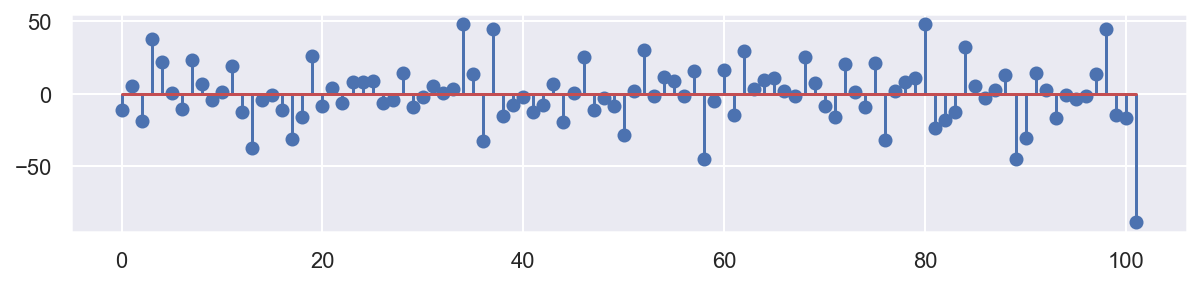

In [11]:
# 잔차 표시
plt.figure(figsize=(10, 2))
plt.stem(result.resid)
plt.show()

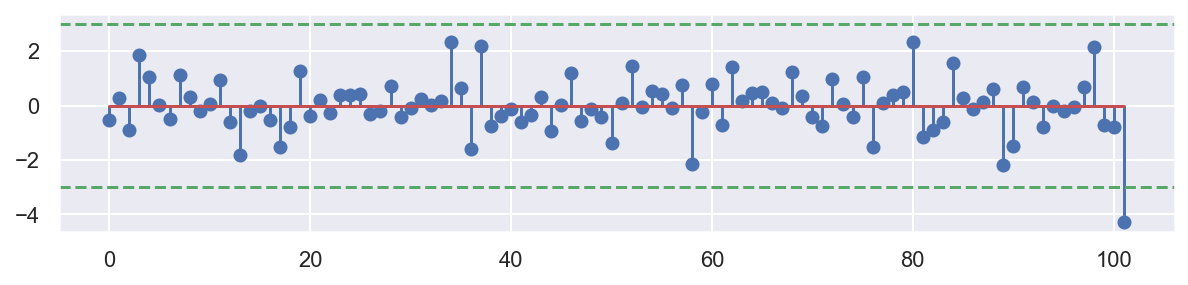

In [14]:
# 표준화 잔차는 resid_pearson 속성
plt.figure(figsize=(10, 2))
plt.stem(result.resid_pearson)
plt.axhline(3, c = 'g', ls = '--')
plt.axhline(-3, c = 'g', ls = '--')
plt.show()

#### 레버리지와 잔차가 큰 데이터를 찾자
- Cook's distance: 잔차가 커지거나 레버리지가 커지면 Cook's distance가 커진다.
- Cook's distance가 4 / (N - K - 1) 보다 크면 아웃라이어로 판단하자

In [16]:
cooks_d2, pvals = influence.cooks_distance
K = influence.k_vars
fox_cr = 4 / (len(y) - K - 1)
idx = np.where(cooks_d2 > fox_cr)[0]
idx 

array([ 34,  37,  80,  81,  89, 100, 101], dtype=int64)